In [18]:
import pandas as pd
import statsmodels

Morceau de code pour les transformations

```
# log de la variable
var_log = np.log(var)

# soustraite la mm
var_mm = var_log.rolling(window=12).mean()
var_log_moins_mean = var_log - var_mm

# decroissance expo
exp_decalage = var_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
var_log_exp_decalage = var_log - exp_decalage

# decalage des points
var_log_shift = var_log - var_log.shift()

# ne pas oublier de supprimer des points si necessaire (moyenne mobile, decalage vont engendrer des NaN)
```

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/production/course_5226/datasets/ch4_meat.csv")

df

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
822,2012-07-01,2200.8,9.5,1721.8,12.5,3127.0,43.4,497.2
823,2012-08-01,2367.5,10.1,1997.9,14.2,3317.4,51.0,530.1
824,2012-09-01,2016.0,8.8,1911.0,12.5,2927.1,43.7,453.1
825,2012-10-01,2343.7,10.3,2210.4,14.2,3335.0,43.8,579.9


## Manipuation des times series

### 1/ Pre taitement

- 1.1 Transformer les types si necessaire

- 1.2 Indexer la time serie

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             827 non-null    object 
 1   beef             827 non-null    float64
 2   veal             827 non-null    float64
 3   pork             827 non-null    float64
 4   lamb_and_mutton  827 non-null    float64
 5   broilers         635 non-null    float64
 6   other_chicken    143 non-null    float64
 7   turkey           635 non-null    float64
dtypes: float64(7), object(1)
memory usage: 51.8+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             827 non-null    datetime64[ns]
 1   beef             827 non-null    float64       
 2   veal             827 non-null    float64       
 3   pork             827 non-null    float64       
 4   lamb_and_mutton  827 non-null    float64       
 5   broilers         635 non-null    float64       
 6   other_chicken    143 non-null    float64       
 7   turkey           635 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 51.8 KB


In [5]:
df_mod = df.set_index('date', inplace=True)



In [6]:
type(df_mod)
df.head()


,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


### 2/ Manipulation

- 2.1 Calculer les moyennes mobiles glissante tous les 28 mois pour 'beef'

- 2.3 Calculer les moyennes mobiles exponentielles tous les 14 mois pour 'veal'

- 2.4 Effectuer un graphique comportant 'beef' ainsi que la colonne que vous avez créée à la question 

- 2.5 Effectuer un groupement par année pour l'ensemble du jeu de donnée (nouveau dataframe)

- 2.6 Effectuer un graphique du nouveau dataframe en plottant et comparant beef et broilers. Analyser les courbes

In [7]:
### 2.1 Calculer les moyennes mobiles glissantes tous les 28 mois pour 'beef'

import matplotlib.pyplot as plt

# On suppose que df a déjà 'date' comme index (DatetimeIndex)
# Exemple : df = pd.read_csv('ch4_meat.csv', parse_dates=['date']).set_index('date')

# Calcul moyenne mobile glissante sur 28 mois
df['beef_rolling_28'] = df['beef'].rolling(window=28).mean()

df[['beef', 'beef_rolling_28']]


,beef,beef_rolling_28
date,,
1944-01-01,751.0,NaN
1944-02-01,713.0,NaN
1944-03-01,741.0,NaN
1944-04-01,650.0,NaN
1944-05-01,681.0,NaN
...,...,...
2012-07-01,2200.8,2186.053571
2012-08-01,2367.5,2194.207143
2012-09-01,2016.0,2191.664286


In [8]:
### 2.3 Calculer les moyennes mobiles exponentielles tous les 14 mois  pour 'veal'

# Moyenne mobile exponentielle (EMA) sur 14 mois
df['veal_ema_14'] = df['veal'].ewm(span=14, adjust=False).mean()

df[['veal', 'veal_ema_14']]

,veal,veal_ema_14
date,,
1944-01-01,85.0,85.000000
1944-02-01,77.0,83.933333
1944-03-01,90.0,84.742222
1944-04-01,89.0,85.309926
1944-05-01,106.0,88.068602
...,...,...
2012-07-01,9.5,10.169434
2012-08-01,10.1,10.160176
2012-09-01,8.8,9.978819


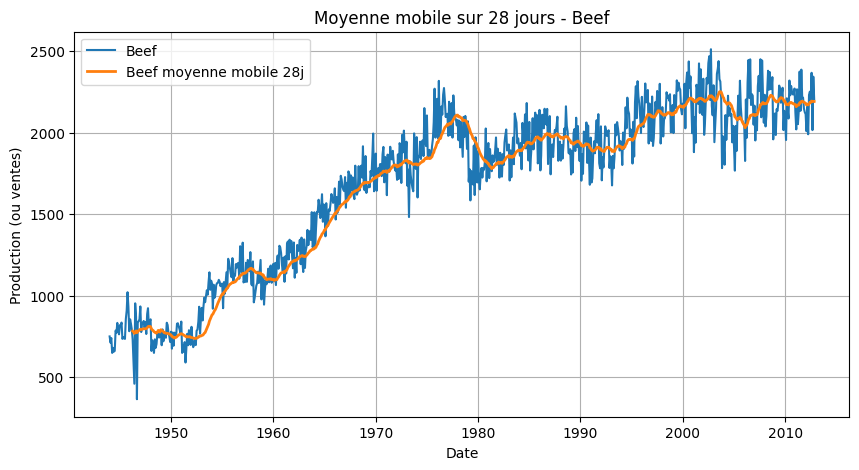

In [9]:
### 2.4 Graphique : 'beef' + sa moyenne mobile (question 2.1)

plt.figure(figsize=(10,5))
plt.plot(df['beef'], label='Beef')
plt.plot(df['beef_rolling_28'], label='Beef moyenne mobile 28j', linewidth=2)
plt.title("Moyenne mobile sur 28 jours - Beef")
plt.xlabel("Date")
plt.ylabel("Production (ou ventes)")
plt.legend()
plt.grid(True)
plt.show()

Le graphique illustre l’évolution de la production (ou consommation) de bœuf sur la période observée, accompagnée de sa moyenne mobile glissante sur 28 jours.

Tendance générale :
On observe une forte croissance de la production de bœuf entre les années 1940 et la fin des années 1970, suivie d’une stagnation voire d’un léger recul à partir des années 1980.

Variabilité :
Les fluctuations à court terme (courbe bleue) sont marquées, mais la moyenne mobile (courbe orange) permet de lisser les variations saisonnières et de mieux visualiser la tendance de fond.

Périodes clés :

1940-1960 : croissance régulière après la guerre.

1970-1980 : pic de production (niveau maximal).

1980-2000 : stabilisation, puis légère baisse.

Après 2000 : niveau globalement élevé mais sans progression.

Analyse économique possible :
Cette évolution pourrait refléter des changements de comportements alimentaires, des coûts de production ou encore une substitution progressive vers d’autres viandes (volaille notamment).

In [10]:
### 2.5 Groupement par année (nouveau DataFrame)

# Regroupement annuel (en moyenne par an)
df_yearly = df.resample('YE').mean()

df_yearly.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey,beef_rolling_28,veal_ema_14
date,,,,,,,,,
1944-12-31,733.416667,135.750000,958.500000,83.416667,NaN,NaN,NaN,NaN,105.207094
1945-12-31,828.000000,129.333333,736.916667,85.833333,NaN,NaN,NaN,NaN,130.223169
1946-12-31,750.833333,110.750000,768.333333,78.833333,NaN,NaN,NaN,780.634921,120.005490
1947-12-31,841.333333,124.416667,734.250000,64.916667,NaN,NaN,NaN,801.032738,120.724786
1948-12-31,730.500000,110.250000,707.166667,60.666667,NaN,NaN,NaN,784.312500,117.285034


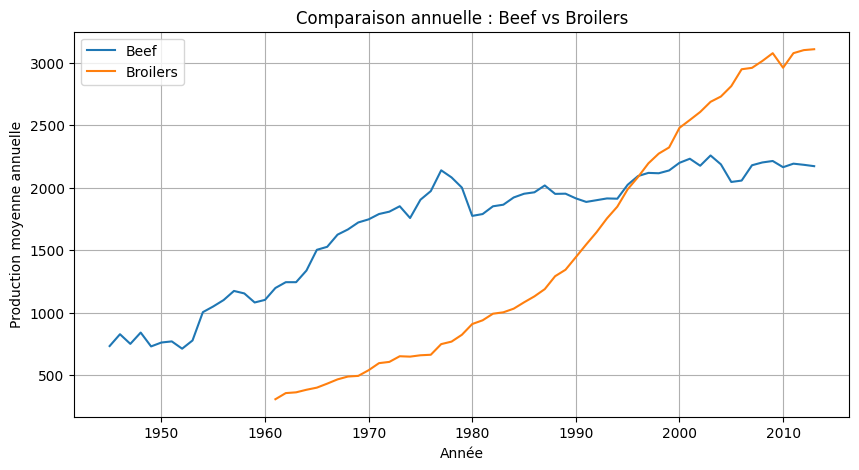

In [11]:
### 2.6 Graphique comparatif : beef vs broilers (données annuelles)

plt.figure(figsize=(10,5))
plt.plot(df_yearly.index, df_yearly['beef'], label='Beef')
plt.plot(df_yearly.index, df_yearly['broilers'], label='Broilers')
plt.title("Comparaison annuelle : Beef vs Broilers")
plt.xlabel("Année")
plt.ylabel("Production moyenne annuelle")
plt.legend()
plt.grid(True)
plt.show()

Tendances générales :

Beef (bœuf) : croissance soutenue jusqu’à la fin des années 1970, suivie d’une stagnation, voire d’un léger déclin après les années 1980.

Broilers (volaille) : croissance rapide, continue et exponentielle à partir des années 1960, dépassant le bœuf vers la fin des années 1980.

🔹 Croisement des courbes :

Le point d’inflexion se situe autour de 1985-1990, moment où la production de volaille dépasse celle du bœuf.

À partir de là, la tendance s’inverse : la volaille devient la viande dominante sur le marché.

🔹 Analyse économique et sociétale :

Cette évolution traduit un changement majeur dans les habitudes de consommation :

La volaille est perçue comme plus abordable, plus saine, et plus rapide à produire.

Le bœuf, au contraire, devient plus coûteux à produire (prix des céréales, empreinte carbone, etc.) et moins attractif pour des régimes allégés ou à visée santé.

Le graphique illustre donc une transition structurelle durable du marché des viandes aux États-Unis (ou contexte similaire), marquée par la montée en puissance du poulet.

### 3/ Stationnarité

- 3.1 Renseignez vous sur la stationnarité -> statsmodel documentation

- 3.2 Effectuer une decomposition saisonniere du beef et veal. Quelles sont les features que vous obtenez ? Que representent-elles ?

- 3.3 Renseigner vous sur les tests de stationnarité. -> ADF Fuller

- 3.4 Effectuer un test de stationnarité sur ces deux même valeur

In [12]:
### 3.1 Stationnarité – notion générale

# Une série temporelle est dite *stationnaire* si ses propriétés statistiques
# (moyenne, variance, autocorrélation) restent constantes dans le temps.
# En d'autres termes, elle ne présente ni tendance globale, ni saisonnalité marquée.

# Référence : https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html


In [13]:
### 3.2 Décomposition saisonnière : Beef et Veal
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_seasonal_decomposition(df, column, period=12, model='additive'):
    """Display a clean seasonal decomposition plot for a specific time series column."""
    decomposition = sm.tsa.seasonal_decompose(df[column], model=model, period=period)

    fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
    components = {
        'Observed': decomposition.observed,
        'Trend': decomposition.trend,
        'Seasonal': decomposition.seasonal,
        'Residuals': decomposition.resid
    }
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    for ax, (title, serie), color in zip(axes, components.items(), colors):
        ax.plot(serie, color=color, linewidth=1.8)
        ax.set_title(title, fontsize=11, weight='bold', loc='left')
        ax.grid(True, linestyle='--', alpha=0.4)

    plt.suptitle(f"Décomposition saisonnière – {column.capitalize()}", fontsize=15, weight='bold', y=0.95)
    plt.xlabel("Date", fontsize=11)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()



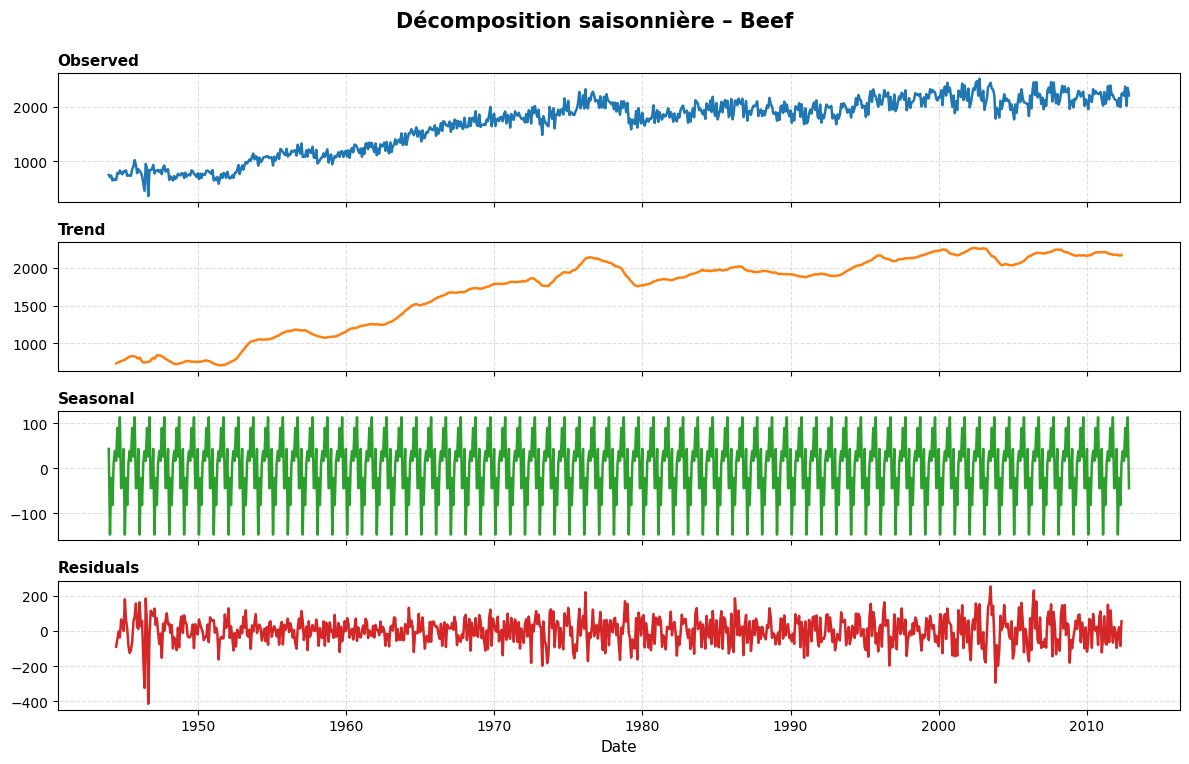

In [14]:
# Pour Beef
plot_seasonal_decomposition(df, 'beef')


L’analyse met en évidence une série temporelle non stationnaire, structurée par une tendance haussière, une saisonnalité stable et des résidus aléatoires.

Tendance (Trend) : forte croissance de la production de bœuf de 1940 à environ 1980, suivie d’une stabilisation durable. Cela traduit une phase d’expansion du secteur, puis une maturité du marché.

Saisonnalité (Seasonal) : fluctuations régulières et répétitives d’amplitude constante, suggérant un cycle annuel stable probablement lié aux périodes de consommation ou de production.

Résidus (Residuals) : dispersés mais centrés autour de zéro, indiquant que la majorité de la variabilité est expliquée par les composantes précédentes.

Conclusion : la série présente une structure temporelle marquée (tendance + saisonnalité), ce qui confirme sa non-stationnarité. Un traitement de différenciation serait nécessaire avant toute modélisation statistique (ARIMA, etc.).

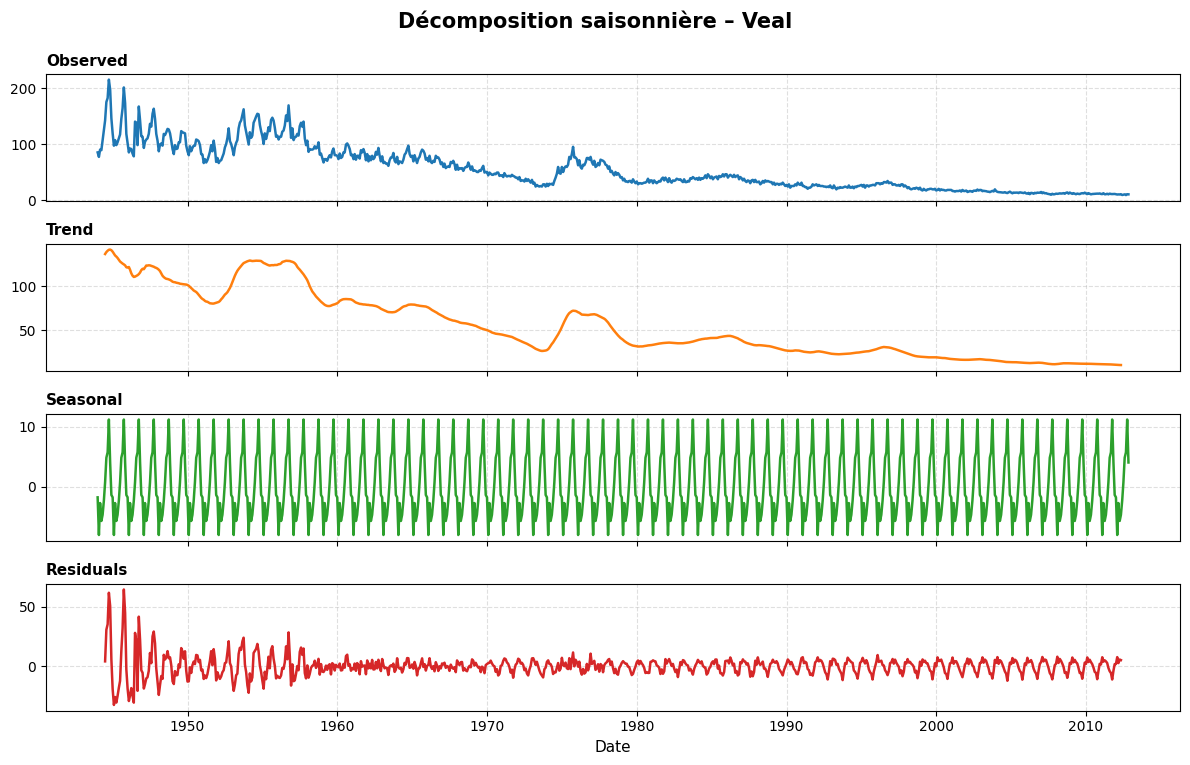

In [15]:

# Pour Veal
plot_seasonal_decomposition(df, 'veal')

L’analyse de la série temporelle Veal met en évidence une forte décroissance de la production au fil du temps, accompagnée d’une saisonnalité stable et de résidus faibles.

Tendance (Trend) : la production de veau diminue de manière continue depuis les années 1940, passant d’un niveau élevé (plus de 150) à une valeur proche de zéro après les années 2000.
→ Cette baisse traduit une réduction progressive de la consommation et de la production de veau, probablement liée à des changements économiques et culturels (prix, préférences alimentaires, réglementation, etc.).

Saisonnalité (Seasonal) : les oscillations saisonnières sont régulières et de faible amplitude (~±10).
→ Cela indique des fluctuations cycliques prévisibles, mais beaucoup moins marquées que pour le bœuf.

Résidus (Residuals) : les résidus sont faibles et centrés autour de zéro, ce qui montre que la tendance et la saisonnalité expliquent bien la dynamique globale.
→ On observe toutefois une variabilité plus forte en début de période, suggérant une production historiquement plus instable.

In [16]:
from statsmodels.tsa.stattools import adfuller

def test_stationnarite(serie, nom):
    result = adfuller(serie.dropna())
    print(f"--- Test ADF pour {nom} ---")
    print(f"Statistique ADF : {result[0]:.4f}")
    print(f"p-value : {result[1]:.4f}")
    print("Valeurs critiques :")
    for key, value in result[4].items():
        print(f"   {key}: {value:.4f}")
    if result[1] < 0.05:
        print("✅ Série stationnaire (on rejette H0)")
    else:
        print("❌ Série non stationnaire (on ne rejette pas H0)")
    print("\n")


# Test sur les séries originales
#test_stationnarite(df['beef'], 'Beef (originale)')
#test_stationnarite(df['veal'], 'Veal (originale)')

# Test sur les séries différenciées
df['beef_diff'] = df['beef'].diff()
df['veal_diff'] = df['veal'].diff()

test_stationnarite(df['beef_diff'], 'Beef (différenciée)')


--- Test ADF pour Beef (différenciée) ---
Statistique ADF : -7.5598
p-value : 0.0000
Valeurs critiques :
   1%: -3.4385
   5%: -2.8651
   10%: -2.5687
✅ Série stationnaire (on rejette H0)




Après différenciation, la série Beef est devenue stationnaire.
Cela signifie qu’elle ne présente plus de tendance et peut désormais être utilisée dans un modèle ARIMA ou SARIMA fiable.

In [17]:
test_stationnarite(df['veal_diff'], 'Veal (différenciée)')


--- Test ADF pour Veal (différenciée) ---
Statistique ADF : -7.3786
p-value : 0.0000
Valeurs critiques :
   1%: -3.4385
   5%: -2.8651
   10%: -2.5687
✅ Série stationnaire (on rejette H0)




La statistique ADF (-7.38) est  inférieure aux seuils critiques, et la p-value est 0.0000.
On rejette H₀ : la série ne contient pas de racine unitaire et est stationnaire.

Après différenciation, la série Veal est également stationnaire.
Cela signifie qu’elle ne présente plus de tendance marquée et peut être utilisée efficacement dans un modèle ARIMA ou SARIMA.